# Loading and Preprocessing Data with TensorFlow

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 1. How to build powerful input pipelines using the Data API

* How to train on very large datasets that will not fit in RAM

* Loading and preprocessing a large dataset can be tricky

* TensorFlow makes it easy through the Data API

* Data API can read from text files (such as CSV files), binary files with fixed-size records, and binary files that use TensorFlow’s TFRecord format

* The Data API also has support for reading from SQL databases

#### let’s start with a dataset entirely in RAM using tf.data.Dataset.from_tensor_slices():

In [2]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

Equivalently:

In [3]:
dataset = tf.data.Dataset.range(10)

* ```from_tensor_slices() ``` takes a tensor and creates a ```tf.data.Dataset``` whose elements are all the slices of X

In [4]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


## Chaining Transformations

* call the repeat() method on the original dataset, and it returns a new dataset that will repeat the items of the original dataset three times.

* this will not copy all the data in memory three times

* call the batch() method on this new dataset, and again this creates a new dataset, which groups the items of the previous dataset in batches of seven items

* The dataset methods do not modify datasets, they create new ones, so make sure to keep a reference to these new datasets

In [5]:
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int64)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([8 9], shape=(2,), dtype=int64)


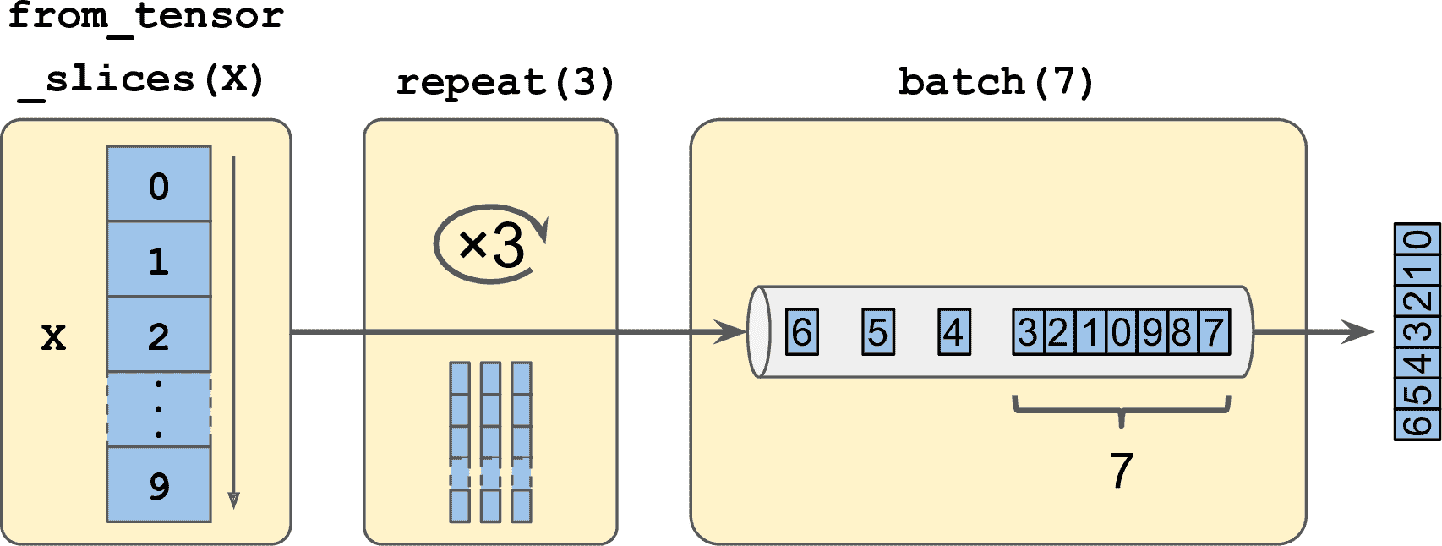

* You can also transform the items by calling the map() method

* the function you pass to the map() method must be convertible to a TF Function

In [6]:
dataset = dataset.map(lambda x: x * 2)

In [7]:
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int64)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int64)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int64)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int64)
tf.Tensor([16 18], shape=(2,), dtype=int64)


* the apply() method applies a transformation to the dataset as a whole

* the following code applies the unbatch() function to the dataset

* Each item in the new dataset will be a single-integer tensor instead of a batch of seven integers

In [8]:
#dataset = dataset.apply(tf.data.experimental.unbatch()) # Now deprecated
dataset = dataset.unbatch()

In [9]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(14, sh

* It is also possible to simply filter the dataset using the filter() method

In [10]:
dataset = dataset.filter(lambda x: x < 10)  # keep only items < 10

In [11]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


* You will often want to look at just a few items from a dataset. You can use the take() method for that

In [12]:
for item in dataset.take(3):
    print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)


## Shuffling the Data

* Gradient Descent works best when the instances in the training set are independent and identically distributed
    * IID: each random variable has the same probability distribution as the others and all are mutually independent

* shuffle() method will create a new dataset that will start by filling up a buffer with the first items of the source dataset

* whenever it is asked for an item, it will pull one out randomly from the buffer and
replace it with a fresh one from the source dataset

* You must specify the buffer size, and it is important to make it large enough, or else shuffling will not be very effective

In [13]:
tf.random.set_seed(42)

dataset = tf.data.Dataset.range(10).repeat(3)
dataset = dataset.shuffle(buffer_size=3, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([1 3 0 4 2 5 6], shape=(7,), dtype=int64)
tf.Tensor([8 7 1 0 3 2 5], shape=(7,), dtype=int64)
tf.Tensor([4 6 9 8 9 7 0], shape=(7,), dtype=int64)
tf.Tensor([3 1 4 5 2 8 7], shape=(7,), dtype=int64)
tf.Tensor([6 9], shape=(2,), dtype=int64)


## Interleaving lines from multiple files

### How to deal with large datasets?

* For a large dataset that does not fit in memory, the above simple shuffling-buffer approach may not be sufficient
* One solution is to shuffle the source data itself

### To shuffle more, 

* Split the source data into multiple files, then read them in a random order during training
* pick multiple files randomly and read them simultaneously, interleaving their records. 
* Then on top of that you can add a shuffling buffer using the shuffle() method


## Split the California dataset to multiple CSV files

Let's start by loading and preparing the California housing dataset. We first load it, then split it into a training set, a validation set and a test set, and finally we scale it:

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_mean = scaler.mean_
X_std = scaler.scale_

* A very large dataset does not fit in memory
* Split it into many files first, then have TensorFlow read these files in parallel. 


### To demonstrate this, let's start by splitting the housing dataset and save it to 20 CSV files:

In [15]:
def save_to_multiple_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = os.path.join("datasets", "housing")
    os.makedirs(housing_dir, exist_ok=True)
    path_format = os.path.join(housing_dir, "my_{}_{:02d}.csv")

    filepaths = []
    m = len(data)
    for file_idx, row_indices in enumerate(np.array_split(np.arange(m), n_parts)):
        part_csv = path_format.format(name_prefix, file_idx)
        filepaths.append(part_csv)
        with open(part_csv, "wt", encoding="utf-8") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

In [16]:
train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_multiple_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_multiple_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_multiple_csv_files(test_data, "test", header, n_parts=10)

* check the first few lines of one of these CSV files:

In [17]:
import pandas as pd

pd.read_csv(train_filepaths[0]).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43,1.442
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39,1.687
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98,1.621
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70,2.621
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93,0.956


Or in text mode:

In [18]:
with open(train_filepaths[0]) as f:
    for i in range(5):
        print(f.readline(), end="")

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621
7.1736,12.0,6.289002557544757,0.9974424552429667,1054.0,2.6956521739130435,33.55,-117.7,2.621


In [19]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

## Building an Input Pipeline

* By default, the list_files() function returns a dataset that shuffles the file paths

In [20]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [21]:
for filepath in filepath_dataset:
    print(filepath)

tf.Tensor(b'datasets\\housing\\my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_04.csv', sh

* Next, you can call the interleave() method to read from five files (n_readers = 5) at a time and interleave their lines

* The interleave() method will create a dataset that will pull five file paths(cycle_length=n_readers) from the filepath_dataset, and for each one(filepath) it will call the function you gave it (a lambda in this example) to create a new dataset (in this case a TextLineDataset).


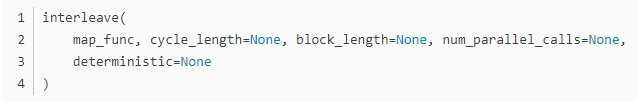



In [22]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1), # skip the header row
    cycle_length=n_readers)

#### Check the dataset

*  These are the first rows (ignoring the header row) of five CSV files, chosen randomly. 
* these are just byte strings; we need to parse them and scale the data

In [23]:
for line in dataset.take(5):
    print(line.numpy())

b'4.6477,38.0,5.03728813559322,0.911864406779661,745.0,2.5254237288135593,32.64,-117.07,1.504'
b'8.72,44.0,6.163179916317992,1.0460251046025104,668.0,2.794979079497908,34.2,-118.18,4.159'
b'3.8456,35.0,5.461346633416459,0.9576059850374065,1154.0,2.8778054862842892,37.96,-122.05,1.598'
b'3.3456,37.0,4.514084507042254,0.9084507042253521,458.0,3.2253521126760565,36.67,-121.7,2.526'
b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625'


#### How to parse string into fields

* we need to parse them and scale the data
* Notice: In the example below, the field 4 is interpreted as a string.

In [24]:
record_defaults=[0, np.nan, tf.constant(np.nan, dtype=tf.float64), "Hello", tf.constant([])]
parsed_fields = tf.io.decode_csv('1,2,3,4,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'4'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

* Notice that all missing fields are replaced with their default value, when provided:

In [25]:
parsed_fields = tf.io.decode_csv(',,,,5', record_defaults)
parsed_fields

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=nan>,
 <tf.Tensor: shape=(), dtype=float64, numpy=nan>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Hello'>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>]

The 5th field is compulsory (since we provided `tf.constant([])` as the "default value"), so we get an exception if we do not provide it:

In [26]:
try:
    parsed_fields = tf.io.decode_csv(',,,,', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Field 4 is required but missing in record 0! [Op:DecodeCSV]


The number of fields should match exactly the number of fields in the `record_defaults`:

In [27]:
try:
    parsed_fields = tf.io.decode_csv('1,2,3,4,5,6,7', record_defaults)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

Expect 5 fields but have 7 in record 0 [Op:DecodeCSV]


## Loading and Preprocessing Data from multiple CSVs


### Preprocessing the Data

In [28]:
n_inputs = 8 # X_train.shape[-1]

#@tf.function
def preprocess(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    x = tf.stack(fields[:-1])
    y = tf.stack(fields[-1:])
    return (x - X_mean) / X_std, y

***Notes:***

* X_mean and X_std are just 1D tensors (or NumPy arrays) containing eight floats, one per input feature
* The preprocess() function takes one CSV line and starts by parsing it.
* ```defs``` tells TensorFlow not only the default value for each column, but also the number of columns and their types
* The decode_csv() function returns a list of scalar tensors (one per column)
* ```tf.stack()``` will stack these tensors into a 1D array with multiple values
* Finally standardize x to z-scores

#### Try a sample line: 

In [29]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204564, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

#### Put together everthing into one function

* it will create and return a dataset that will efficiently load California housing data from multiple CSV files, preprocess it, shuffle it, optionally
repeat it, and batch it


In [30]:
def csv_reader_dataset(filepaths, repeat=1, n_readers=5,  # number of files or filepaths
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    
    # pick multiple files randomly and read them simultaneously, interleaving their records
    # list_files() function returns a dataset that "shuffles" the file paths, then repeat 'repeat' times
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    
    
    
    # interleave() method to read from cycle_length(=n_readers) files at a time and
    # "interleave their lines" (called cycle) : reading one line at a time from each until all datasets are out of items
    # Then it will get the next five file paths from the 'dataset' and interleave them the same way,
    # and so on until it runs out of file paths
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1), # skip the header row via map_func
        cycle_length=n_readers, # 'interleave' pull cycle_length(=n_readers) file paths(1 by 1) from the 'dataset'
        num_parallel_calls=n_read_threads) 
    #and for each one(filepath) it will call the function you gave it(lambda) to create a new dataset(TextLineDataset)
    #the interleave dataset including cycle_length(=n_readers) datasets
    
    
    # Then on top of that you can add a shuffling buffer using the shuffle() method
    dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)  # call preprocess()
    dataset = dataset.batch(batch_size) #group the items of the previous dataset in batches of 'batch_size' items
    
    
    # See the notes below
    return dataset.prefetch(1)

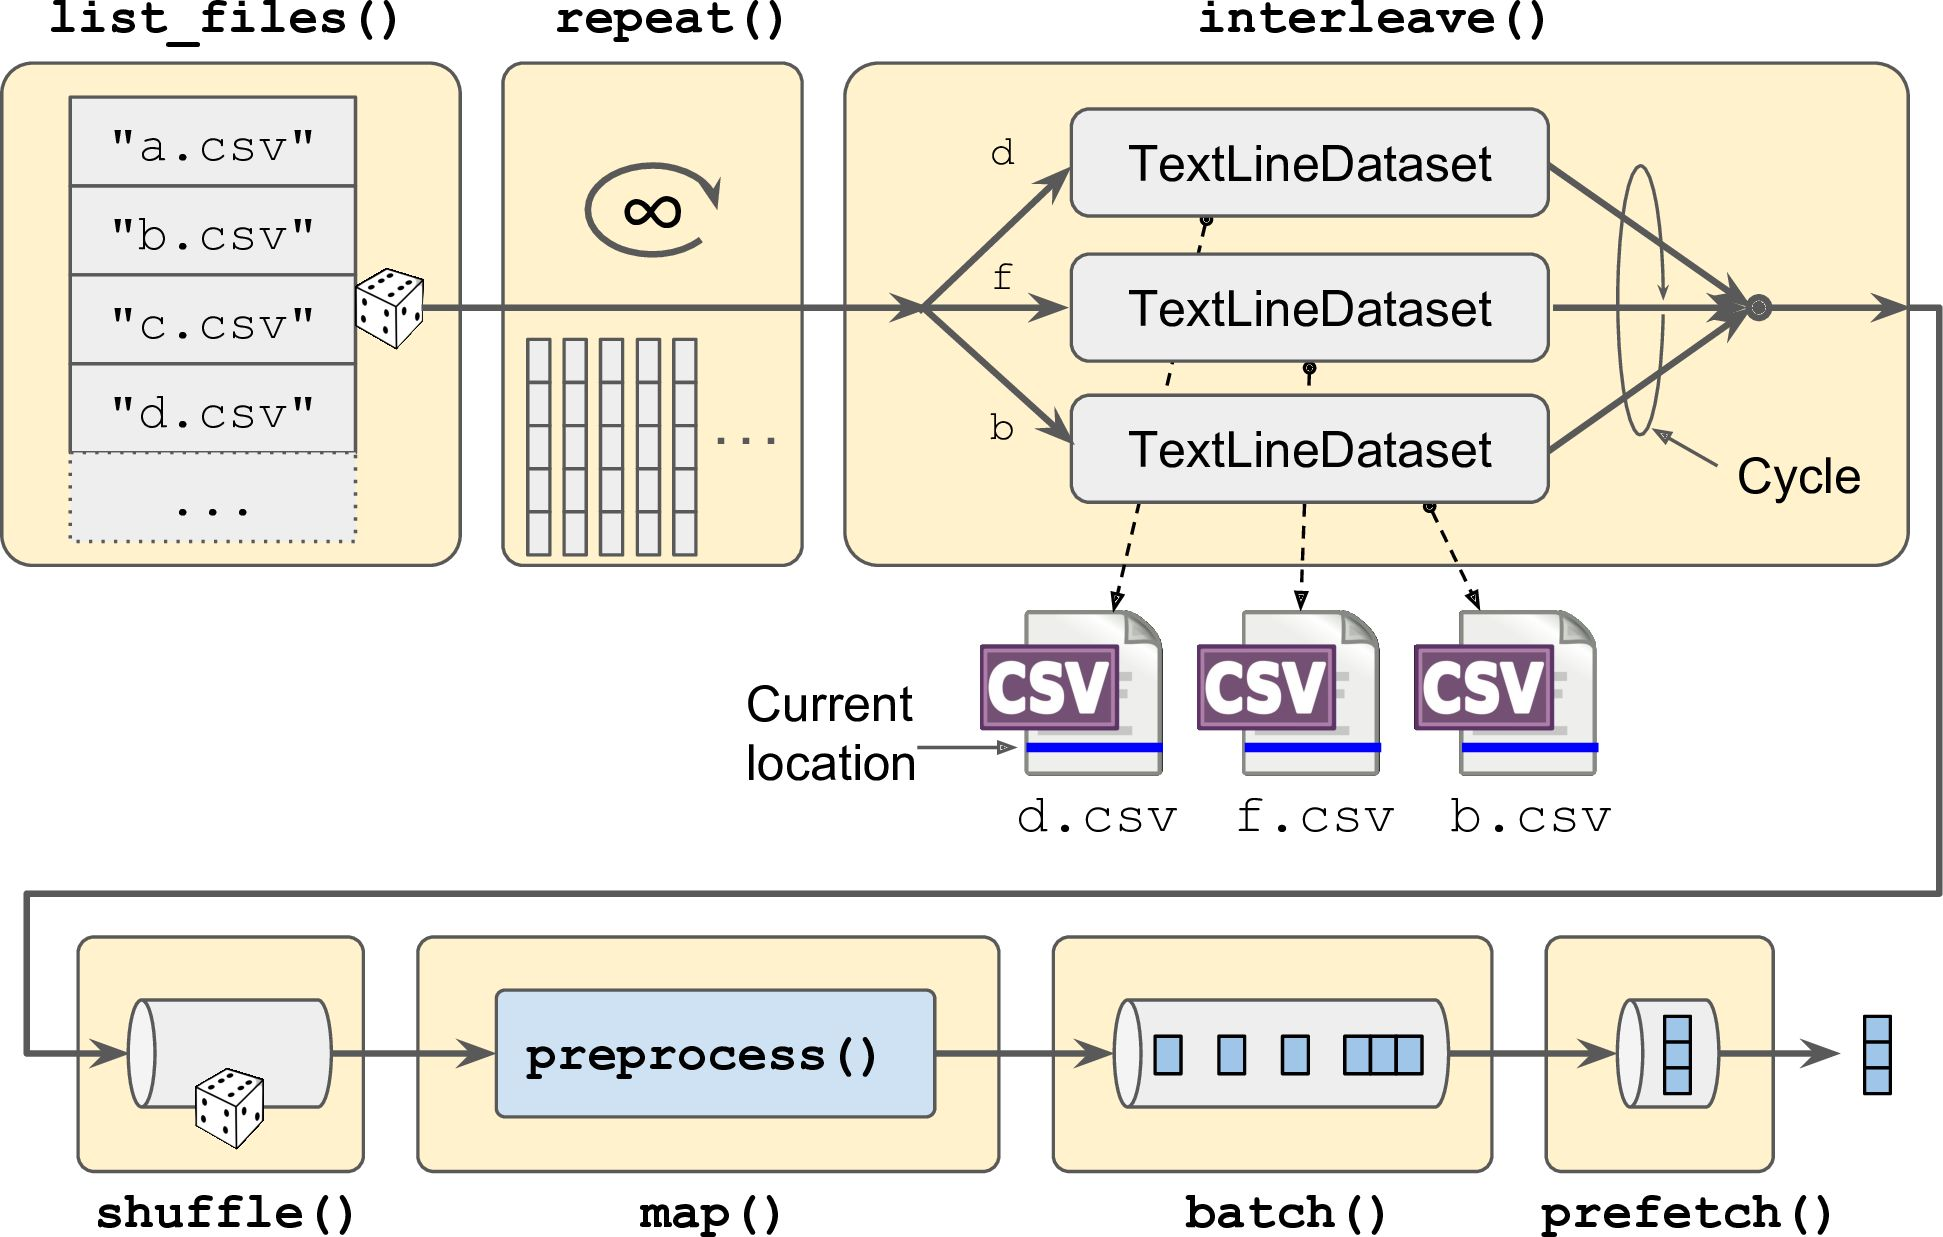

### Prefetching for best performance

* By calling prefetch(1) at the end, we are creating a dataset that will do its best to always be one batch ahead. 
* In other words, while our training algorithm is working on one batch, 
* the dataset will already be working in parallel on getting the next batch ready
* this way the GPU will be almost 100% utilized (except for the data transfer time from the CPU to the GPU3), and training will run much faster.
* With prefetching, the CPU and the GPU work in parallel: as the GPU works on one batch, the CPU works on the next


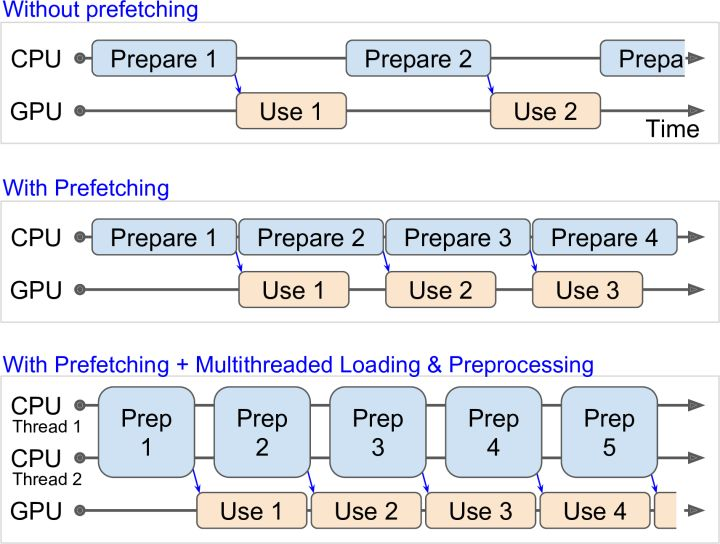


#### Here is how we get the batches at the end of preprocessing

In [31]:
tf.random.set_seed(42)

train_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in train_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[ 0.5804519  -0.20762321  0.05616303 -0.15191229  0.01343246  0.00604472
   1.2525111  -1.3671792 ]
 [ 5.818099    1.8491895   1.1784915   0.28173092 -1.2496178  -0.3571987
   0.7231292  -1.0023477 ]
 [-0.9253566   0.5834586  -0.7807257  -0.28213993 -0.36530012  0.27389365
  -0.76194876  0.72684526]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.752]
 [1.313]
 [1.535]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.8324941   0.6625668  -0.20741376 -0.18699841 -0.14536144  0.09635526
   0.9807942  -0.67250353]
 [-0.62183803  0.5834586  -0.19862501 -0.3500319  -1.1437552  -0.3363751
   1.107282   -0.8674123 ]
 [ 0.8683102   0.02970133  0.3427381  -0.29872298  0.7124906   0.28026953
  -0.72915536  0.86178064]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.919]
 [1.028]
 [2.182]], shape=(3, 1), dtype=float32)



### Summary -- A typical preprocessing pipeline

* dataset from list of filepaths
* interleave lines of data from the filepaths
* preprocess each line: parse data, transform
* repeat and shuffle the data
* split into batches with prefetching

### Ready to bring dataset to model 

* Each of the below is a **prefetchdataset**. Keras knows how to read them.

In [32]:
train_set = csv_reader_dataset(train_filepaths, repeat=None)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [33]:
train_set

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

#### Build a simple DNN

In [34]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

* pass the training and validation datasets to the fit() method, instead of X_train, y_train, X_valid, and y_valid

* fit() method will take care of repeating the training dataset

In [36]:
batch_size = 32
model.fit(train_set, steps_per_epoch=len(X_train) // batch_size, # 362
          epochs=10,
          validation_data=valid_set)

Epoch 1/10
362/362 [==============================] - 4s 10ms/step - loss: 1.4679 - val_loss: 21.5124
Epoch 2/10
362/362 [==============================] - 1s 3ms/step - loss: 0.8735 - val_loss: 0.6648
Epoch 3/10
362/362 [==============================] - 1s 2ms/step - loss: 0.6317 - val_loss: 0.6196
Epoch 4/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5933 - val_loss: 0.5669
Epoch 5/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5629 - val_loss: 0.5402
Epoch 6/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5693 - val_loss: 0.5209
Epoch 7/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5231 - val_loss: 0.6130
Epoch 8/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5074 - val_loss: 0.4818
Epoch 9/10
362/362 [==============================] - 1s 3ms/step - loss: 0.4963 - val_loss: 0.4904
Epoch 10/10
362/362 [==============================] - 1s 3ms/step - loss: 0.5023 - val_loss: 0.45

* Similarly, we can pass a dataset to the evaluate() and predict() methods

In [37]:
model.evaluate(test_set, steps=len(X_test) // batch_size)

161/161 [==============================] - 1s 2ms/step - loss: 0.4788


0.4787752032279968

***Notes***

* test_set includes labels

In [38]:
test_set

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [39]:
new_set = test_set.map(lambda X, y: X) # we could instead just pass test_set, Keras would ignore the labels
X_new = X_test
model.predict(new_set, steps=len(X_new) // batch_size)

array([[3.8256307],
       [2.4103103],
       [1.048903 ],
       ...,
       [3.1952968],
       [1.4562888],
       [3.159451 ]], dtype=float32)

In [40]:
list(new_set)

[<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
 array([[ 0.16338226, -0.44494775,  0.27062452, -0.26945964, -0.36712533,
         -0.01291615,  1.4164782 , -0.85741866],
        [-0.16752908,  1.2954322 , -0.53403527, -0.02550606, -0.24392317,
         -0.647378  , -0.73852515,  0.6168959 ],
        [ 2.2102342 , -1.6315705 ,  0.94811493, -0.18629026,  0.5892885 ,
          0.16314048, -0.82753557,  0.90676165],
        [ 0.43725616, -0.998705  ,  0.23435852, -0.3786857 , -0.46294922,
          0.23483858, -1.2772769 ,  1.2266121 ],
        [-0.39389792,  1.2954322 ,  0.11324127, -0.20115314, -0.5341327 ,
         -0.18605515,  0.9339452 , -0.6974934 ],
        [-0.7891269 , -0.60316414,  0.44858536,  0.21562596, -0.8343809 ,
         -0.01887918,  1.8896431 , -1.397164  ],
        [ 1.1968119 ,  0.34613404,  0.20797616, -0.41088957, -0.06961492,
         -0.14025113, -1.3522334 ,  1.3065728 ],
        [ 0.58946055,  0.42524222,  0.15634334, -0.20662263, -0.53687054,
         -0.028

In [41]:
new_set = test_set.take(3).map(lambda X, y: X) # pretend we have 3 new instances

In [42]:
list(new_set)

[<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
 array([[ 0.17087196,  1.8491895 , -0.02320261, -0.12272719, -0.0568384 ,
         -0.08545065,  0.999532  , -1.4471437 ],
        [-0.11468165, -0.2867314 , -1.0918899 ,  0.29259846, -0.759547  ,
         -0.68454146,  1.0135876 , -1.4121602 ],
        [ 0.10440702,  1.1372159 , -0.6544708 , -0.31728342, -0.53687054,
         -0.18987034,  0.8121414 , -1.2172476 ],
        [ 0.41677707, -0.8404887 ,  0.34921613, -0.14425252, -0.39906663,
          0.25591397, -1.3709713 ,  1.2565969 ],
        [-0.08377983,  1.1372159 , -0.5198974 , -0.06366757, -0.36073706,
         -0.38149992,  0.81682545, -1.2522311 ],
        [ 0.03652764, -0.91959685,  0.01473113, -0.19545545, -0.8489827 ,
         -0.34739783,  1.4071101 , -0.96736413],
        [-0.24043639,  0.5043504 ,  0.16758156, -0.13050707, -0.28864098,
          0.05035667, -0.4480686 ,  0.7218465 ],
        [ 0.991603  , -0.2867314 ,  0.04545075, -0.23747821,  1.0154767 ,
         -0.188

In [43]:
model.predict(new_set) # a dataset containing new instances

array([[1.2867603 ],
       [2.7144022 ],
       [1.5260792 ],
       [2.7057214 ],
       [2.260209  ],
       [1.6291034 ],
       [3.006678  ],
       [1.2041081 ],
       [1.4929662 ],
       [2.696137  ],
       [0.8210858 ],
       [2.218586  ],
       [2.1735334 ],
       [1.6272534 ],
       [1.7083651 ],
       [2.1875052 ],
       [3.0677485 ],
       [1.4481041 ],
       [2.1587005 ],
       [1.1422343 ],
       [0.6698229 ],
       [1.5355791 ],
       [1.9667252 ],
       [1.0575733 ],
       [1.8955269 ],
       [1.2367013 ],
       [1.522157  ],
       [1.6249782 ],
       [1.4124933 ],
       [2.3690152 ],
       [1.7477489 ],
       [1.2399728 ],
       [1.5899302 ],
       [2.5207984 ],
       [0.82467467],
       [3.04846   ],
       [1.6964724 ],
       [2.164734  ],
       [1.2887719 ],
       [1.9119077 ],
       [1.3749924 ],
       [1.5455816 ],
       [3.419382  ],
       [0.90127325],
       [1.1382318 ],
       [3.8306704 ],
       [1.8353604 ],
       [1.595

Here is a short description of each method in the `Dataset` class:

In [44]:
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● bucket_by_sequence_length()A transformation that buckets elements in a `Dataset` by length.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● choose_from_datasets()Creates a dataset that deterministically chooses elements from `datasets`.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Create

## 2. How to efficiently store, load, and parse data 


### The `TFRecord` binary format

* The TFRecord format is TensorFlow’s preferred format for storing large amounts of data and reading it efficiently.
* A TFRecord file is just a list of binary records. You can create one using a `tf.io.TFRecordWriter`


#### Read/write one file

In [45]:
with tf.io.TFRecordWriter("my_data.tfrecord") as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

And you can read it using a `tf.data.TFRecordDataset`:

In [46]:
filepaths = ["my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


#### Read multiple files in parallel and interleave their records

* You can read multiple TFRecord files with just one `TFRecordDataset`. 
* By default it will read them one at a time, but if you set `num_parallel_reads=3`, it will read 3 at a time in parallel and interleave their records:

In [47]:
filepaths = ["my_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            f.write("File {} record {}".format(i, j).encode("utf-8"))

dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=3)
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


#### Compressed TFRecord Files

In [48]:
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed.tfrecord", options) as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

In [49]:
dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
                                  compression_type="GZIP")
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


## 3. Preprocessing the Input Features

* Converting all features into numerical features, generally normalizing them, and more
* If your data contains categorical features or text features, they need to be converted to numbers
* Three options:
    * Prepare your data files before loading with Data API
    *  preprocess your data on the fly when loading it with the Data API (e.g., using the dataset’s map() method
    * or, include a preprocessing layer directly in your model, by using Features API

#### Example: implement a standardization layer using a Lambda layer

* For each feature, it subtracts the mean and divides by its standard deviation
* plus a tiny smoothing term eps to avoid division by zero

In [50]:
means = np.mean(X_train, axis=0, keepdims=True)
stds = np.std(X_train, axis=0, keepdims=True)
eps = keras.backend.epsilon()
model = keras.models.Sequential([
    keras.layers.Lambda(lambda inputs: (inputs - means) / (stds + eps)),
    # [...] # other layers
]) 

* use a self-contained custom layer without having global variables like means and stds dangling around

In [51]:
class Standardization(keras.layers.Layer):
    def adapt(self, data_sample):
        self.means_ = np.mean(data_sample, axis=0, keepdims=True)
        self.stds_ = np.std(data_sample, axis=0, keepdims=True)
    def call(self, inputs):
        return (inputs - self.means_) / (self.stds_ + keras.backend.epsilon()) 

* To use this standardization layer, you need to adapt it to your dataset by calling the adapt() method and passing it a data sample
* This sample must be large enough to be representative of your dataset
* in general, a few hundred randomly selected instances will suffice

In [52]:
std_layer = Standardization()
#std_layer.adapt(data_sample) # you will need the data_sample to make it run here

model = keras.Sequential()
model.add(std_layer)

#### Encoding Categorical Features Using One-Hot Vectors

* Assume that there is a categorical feature with five possible values: "<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", and "ISLAND".

* We need to encode this feature before we feed it to a neural network

* we need to map each category to its index (0 to 4)

In [53]:
vocab = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
indices = tf.range(len(vocab), dtype=tf.int64)
indices

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4], dtype=int64)>

* create an initializer for the lookup table, passing it the list of categories
and their corresponding indices

In [54]:
table_init = tf.lookup.KeyValueTensorInitializer(vocab, indices)

* getting the full list of categories may not be convenient
* ```num_oov_buckets``` the number of out-of-vocabulary (oov) buckets
* If we look up a category
that does not exist in the vocabulary, the lookup table will compute a hash of this
category and use it to assign the unknown category to one of the oov buckets.
* if there are not enough oov buckets, there will be collisions

* Their indices start after the known categories, so in this example the indices of
the two oov buckets are 5 and 6

In [55]:
num_oov_buckets = 2 
table = tf.lookup.StaticVocabularyTable(table_init, num_oov_buckets) 
print(table)

In [56]:
categories = tf.constant(["NEAR BAY", "DESERT", "INLAND", "INLAND"])
cat_indices = table.lookup(categories)
cat_indices

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([3, 5, 1, 1], dtype=int64)>

In [57]:
cat_one_hot = tf.one_hot(cat_indices, depth=len(vocab) + num_oov_buckets)
cat_one_hot

<tf.Tensor: shape=(4, 7), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

***Notes***

* The size of each one-hot vector is the
vocabulary length plus the number of oov buckets. 
* This is fine when there are just a
few possible categories ( <10 )
* If the vocabulary is large, it is much more efficient to
encode them using embeddings instead ( > 50 )

### Summary

* Deep Learning often involves large amounts of data
* knowing how to load, parse, and preprocess it efficiently is a crucial skill


***1. The Data API***

dataset: iterable sequence of data instances

tensor to dataset: ```dataset = tf.data.Dataset.from_tensor_slices(X)```


transform datasets with methods such as (copy data, not modify it):

    .map(...): apply function item by item
    .take(n): grab n items from dataset
    .batch(n): split dataset up into batches of length n

Shuffle data:

    data loaded sequentially into buffer then picked out randomly... buffer must be large enoughto provide sufficient randomness
    
```
dataset = tf.data.Dataset.range(10).repeat(3) # 0 to 9, three times
dataset = dataset.shuffle(buffer_size=5, seed=42).batch(7)

```


Shuffle more:

    pre-shuffle data
    split into multiple files and interleave while loading
    
    
Read files line by line with interleaving:

```
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)
```

line-by-line parsing from CSV using 

```
fields = tf.io.decode_csv(line, record_defaults=defs)
```

    where defs gives default values for missing data

Concurrency:

    num_parallel_calls argument
    dataset.batch(batch_size).prefetch(1) to stay one step ahead of training
    
    
***2. TFRecord Format***

if loading/parsing from e.g. csv files is the bottle-neck, consider TFRecord

efficient serialized data format

can be used in TF Functions (with TF protocol buffer data structures)

typical workflow for writing to TFRecord:

    read data from CSV to dataset
    create Example protobuf for each instance
    serialize the dataset
    save to several TFRecord files with shuffling

typical workflow for loading and parsing from TFRecord:

    define description dictionary of serialized data in the TFRecord
    read data in batches from TFRecord using TFRecordDataset class
    parse the examples in each batch
    

***3. Preprocessing Input Features***



convert categorical features to numeric features, normalize, discretize, etc.

can be done with Data API (e.g. .map()) but better to implement as custom Keras layer or use existing ones (self-contained, flexible, easy to incorporate into a model or preprocessing pipeline)

encode categorical features to one-hot vectors

    usually okay for <10 features, but doesn't scale well
    create lookup table from category to index, including extra "out of vocabulary buckets" for categories not encountered when making the lookup table
    convert to one-hot vectors with tf.one_hot(cat_indicies, depth=...)
    bundle functionality into a custom layer, or use experimental keras.layers.TextVectorization:    
        .adapt(data_sample): extract data categories and create lookup table
        .call(train.data): use lookup table to map categories to indices
        use tf.one_hot() in a keras Lambda layer to vectorize indices